In [6]:
%matplotlib inline
import matplotlib
from matplotlib.font_manager import FontProperties
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{amsmath} \usepackage{amssymb}'
from matplotlib import rc
rc('text', usetex=True)

from tqdm import tqdm

from PETITE.ryan_shower import Shower
from PETITE.particle import *
from PETITE.shower import Shower as OldShower

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import FixedLocator

font0 = FontProperties()
font = font0.copy()
font.set_size(24)
font.set_family('serif')
labelfont=font0.copy()
labelfont.set_size(20)
labelfont.set_weight('bold')
legfontBig=font0.copy()
legfontBig.set_size(18)
legfontBig.set_weight('bold')

def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

Comparison: Electrons injected with equal energy to graphite using old/new prescription

In [7]:
E0 = 10.0
p0 = Particle(11, E0, 0., 0., np.sqrt(E0**2 - 0.000511**2), 0, 0, 0, 1, 0, 0, 0, -1, 1.)
MinEnergy = 0.001
sGraphite = Shower('/Users/kjkelly/Documents/GitHub/PETITE/RyanDicts/', 'graphite', MinEnergy)
sGraphiteOld = OldShower('/Users/kjkelly/Documents/GitHub/PETITE/NBP/', 'graphite', MinEnergy)

In [8]:
nSamp = 100
s0 = np.array([sGraphite.ElecBremSample(p0)[1] for i in range(nSamp)])
s0Old = np.array([sGraphiteOld.ElecBremSample(p0)[1] for i in range(nSamp)])

In [ ]:
Es = np.array([s.get_p0()[0] for s in s0])
EsOld = np.array([s.get_p0()[0] for s in s0Old])

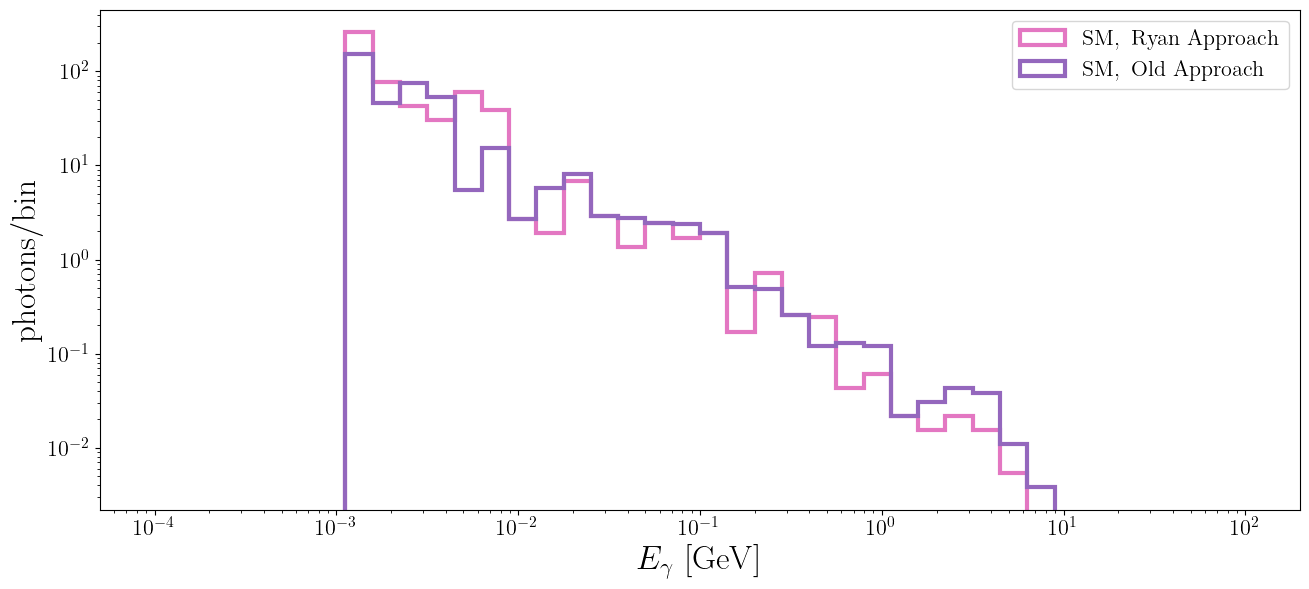

In [5]:
b0 = np.logspace(-4, 2, 41)

plt.hist(Es, bins=b0, histtype='step', lw=3, color='C6', density=True, ls='-', label=r"$\mathrm{SM,\ Ryan\ Approach}$")
plt.hist(EsOld, bins=b0, histtype='step', lw=3, color='C4', ls='-', density=True, label=r"$\mathrm{SM,\ Old\ Approach}$")

plt.gca().legend(loc=1, fontsize=16)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.gca().set_xlabel(r"$E_\gamma\ [\mathrm{GeV}]$", fontsize=24)
plt.gca().set_ylabel(r"$\mathrm{photons/bin}$", fontsize=24)
#plt.gca().axis([1e-3,100,1e-11,1e-3])
[l.set_size(16) for l in plt.gca().get_xticklabels()]
[l.set_size(16) for l in plt.gca().get_yticklabels()]

set_size(12.0, 5.0)


More code to come when we're confident in other changes

In [36]:
SMSPhotons = np.array(SMS)[np.where([ps.get_IDs()[0] == 22 for ps in SMS])[0]]
SMSOldPhotons = np.array(SMSOld)[np.where([ps.get_IDs()[0] == 22 for ps in SMSOld])[0]]

In [37]:
print(len(SMSPhotons), len(SMSOldPhotons))

0 106
